In [1]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/ktmb/ets_2025.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

             date   time         origin    destination  ridership
0      2025-01-01  00:00     Batu Gajah     Alor Setar          1
1      2025-01-01  00:00     Batu Gajah           Arau          1
2      2025-01-01  00:00     Batu Gajah   Padang Besar          1
3      2025-01-01  00:00         Kampar   Padang Besar          2
4      2025-01-01  00:00  Tanjong Malim     Alor Setar          1
...           ...    ...            ...            ...        ...
187788 2025-05-21  23:00   Sungai Buloh           Arau          9
187789 2025-05-21  23:00   Sungai Buloh   Padang Besar          8
187790 2025-05-21  23:00   Sungai Buloh  Sungai Petani          3
187791 2025-05-21  23:00        Taiping    Butterworth          2
187792 2025-05-21  23:00  Tanjong Malim     Batu Gajah          1

[187793 rows x 5 columns]


In [2]:
df

,date,time,origin,destination,ridership
0,2025-01-01,00:00,Batu Gajah,Alor Setar,1
1,2025-01-01,00:00,Batu Gajah,Arau,1
2,2025-01-01,00:00,Batu Gajah,Padang Besar,1
3,2025-01-01,00:00,Kampar,Padang Besar,2
4,2025-01-01,00:00,Tanjong Malim,Alor Setar,1
...,...,...,...,...,...
187788,2025-05-21,23:00,Sungai Buloh,Arau,9
187789,2025-05-21,23:00,Sungai Buloh,Padang Besar,8
187790,2025-05-21,23:00,Sungai Buloh,Sungai Petani,3
187791,2025-05-21,23:00,Taiping,Butterworth,2


In [6]:
df['time'].value_counts().sort_values()

time
03:00       55
02:00      143
01:00      599
00:00      823
23:00     2120
06:00     3857
05:00     4836
22:00     5004
21:00     5012
14:00     6956
11:00     8177
20:00     8619
13:00     8797
12:00     9805
07:00    10032
15:00    10138
19:00    10614
17:00    12414
09:00    13977
18:00    15695
10:00    15860
16:00    16728
08:00    17532
Name: count, dtype: int64

In [7]:
df_hourly = df.groupby('time')['ridership'].sum().reset_index()

In [10]:
df_hourly.set_index('time',inplace=True)

In [12]:
print(df_hourly)

       ridership
time            
00:00       2216
01:00       1813
02:00        263
03:00         90
05:00      54938
06:00      37031
07:00      81033
08:00     162640
09:00      90818
10:00      85122
11:00      69891
12:00     116264
13:00     116546
14:00      40130
15:00     155588
16:00      90343
17:00      70398
18:00     150806
19:00      69414
20:00      56850
21:00      47093
22:00      39694
23:00       8556


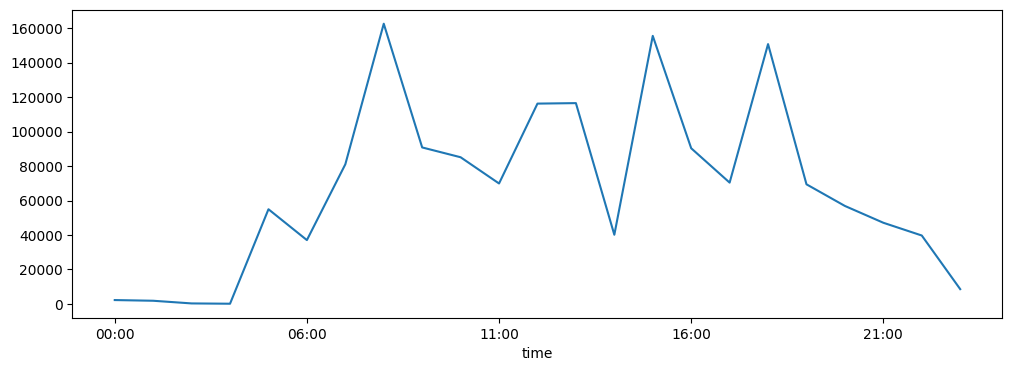

In [13]:
import matplotlib.pyplot as plt

df_hourly['ridership'].plot(figsize=(12,4))
plt.show()